In [12]:
import os
import csv
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.feature import canny
from skimage import morphology
from skimage.morphology import reconstruction
from skimage.measure import label
from matplotlib.pyplot import imshow
from skimage import io, color, morphology, measure

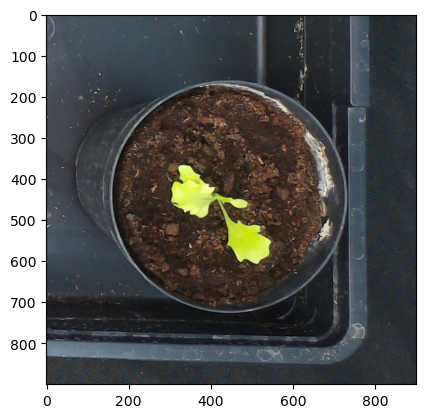

In [4]:
img = imread("preprocessed_images\lettuce4_2024-07-02_15.jpg")
imshow(img)

In [5]:
image = img_as_float(img)

# Apply preprocessing operations
image = gaussian_filter(image, 1)
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image
dilated = reconstruction(seed, mask, method='dilation')
grayscale_dilated = rgb2gray(dilated)
edges1 = canny(grayscale_dilated, sigma=1)
edges_smooth = morphology.dilation(edges1, morphology.disk(5))
edges_smooth = morphology.erosion(edges_smooth, morphology.disk(5))
labels = label(edges_smooth, connectivity=2)
num_leaves = len(np.unique(labels)) - 1

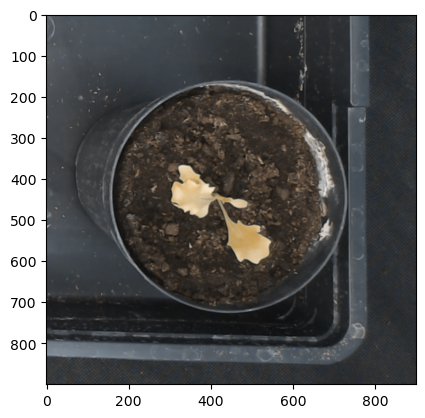

In [7]:
imshow(image)

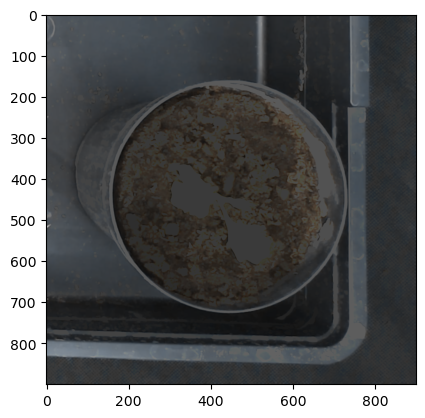

In [8]:
imshow(dilated)

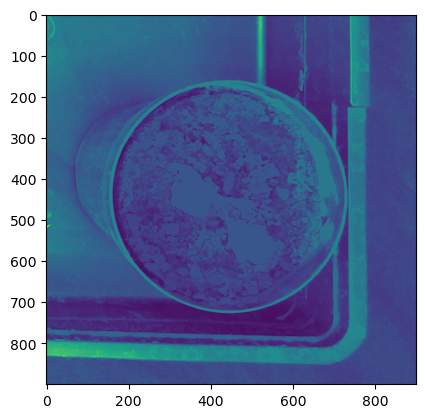

In [9]:
imshow(grayscale_dilated)

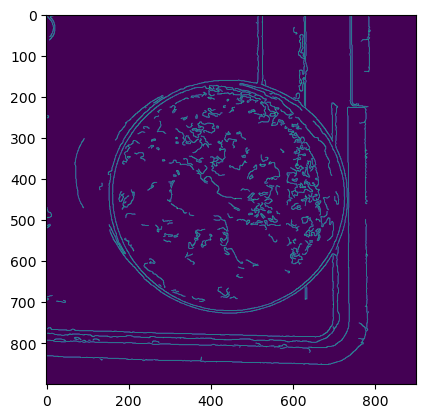

In [10]:
imshow(edges1)

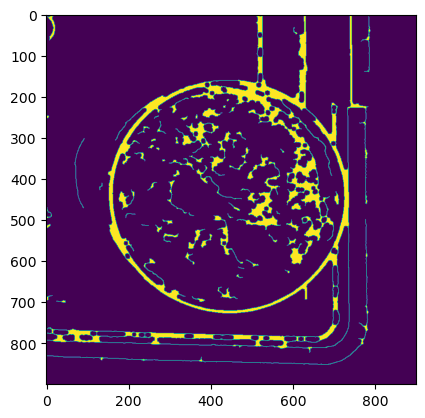

In [11]:
imshow(edges_smooth)

### Another Attemps

In [17]:
hsv_image = color.rgb2hsv(image)

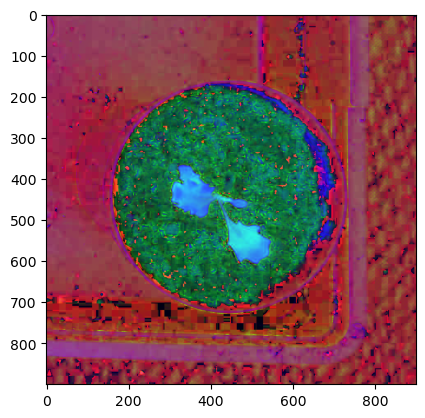

In [84]:
imshow(hsv_image)

In [62]:
lower_hue = 0.15 # Adjust as needed
upper_hue = 0.2 # Adjust as needed
green_mask = (hsv_image[:, :, 0] >= lower_hue) & (hsv_image[:, :, 0] <= upper_hue)

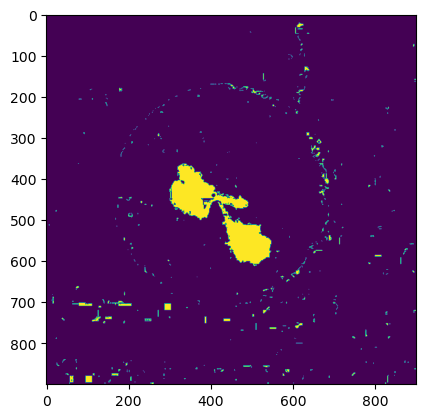

In [66]:
imshow(green_mask)

In [63]:
cleaned_mask = morphology.remove_small_objects(green_mask, min_size=500)

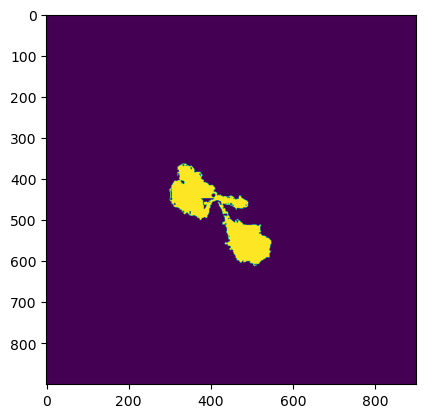

In [67]:
imshow(cleaned_mask)

In [80]:
selem = morphology.disk(5)
opened_mask = morphology.opening(cleaned_mask, selem)

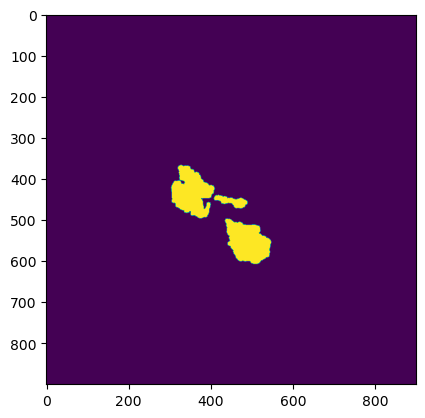

In [81]:
imshow(opened_mask)

In [83]:
labeled_leaves = measure.label(opened_mask)
leaf_count = np.max(labeled_leaves)
print("Number of leaves %d " % leaf_count)

Number of leaves 3 
